# Barebones example

In [1]:
import torchvision
from torch.hub import load_state_dict_from_url
from torch.utils.model_zoo import load_url as load_state_dict_from_url

In [37]:
in_path = '/var/lib/data/imagenet'
in_info_path = '/var/lib/data/imagenet/info'

### Recover ImageNet hierarchy

In [38]:
from robustness.tools.imagenet_helpers import ImageNetHierarchy

in_hier = ImageNetHierarchy(in_path,
                            in_info_path)

### Probe ImageNet hierarchy

In [4]:
for cnt, (wnid, ndesc_in, ndesc_total) in enumerate(in_hier.wnid_sorted):
    if cnt < 10:
        print(f"WordNet ID: {wnid}, Name: {in_hier.wnid_to_name[wnid]}, #ImageNet descendants: {ndesc_in}")

WordNet ID: n00001740, Name: entity, #ImageNet descendants: 1000
WordNet ID: n00001930, Name: physical entity, #ImageNet descendants: 992
WordNet ID: n00002684, Name: object, physical object, #ImageNet descendants: 946
WordNet ID: n00003553, Name: whole, unit, #ImageNet descendants: 936
WordNet ID: n00021939, Name: artifact, artefact, #ImageNet descendants: 521
WordNet ID: n00004258, Name: living thing, animate thing, #ImageNet descendants: 407
WordNet ID: n00004475, Name: organism, being, #ImageNet descendants: 407
WordNet ID: n00015388, Name: animal, animate being, beast, brute, creature, fauna, #ImageNet descendants: 398
WordNet ID: n03575240, Name: instrumentality, instrumentation, #ImageNet descendants: 348
WordNet ID: n01466257, Name: chordate, #ImageNet descendants: 207


In [5]:
ancestor_wnid = 'n02120997'
print(f"Superclass | WordNet ID: {ancestor_wnid}, Name: {in_hier.wnid_to_name[ancestor_wnid]}")
for cnt, wnid in enumerate(in_hier.tree[ancestor_wnid].descendants_all):
    if wnid in in_hier.in_wnids:
        print(f"ImageNet subclass | WordNet ID: {wnid}, Name: {in_hier.wnid_to_name[wnid]}")

Superclass | WordNet ID: n02120997, Name: feline, felid
ImageNet subclass | WordNet ID: n02125311, Name: cougar, puma, catamount, mountain lion, painter, panther, Felis concolor
ImageNet subclass | WordNet ID: n02128385, Name: leopard, Panthera pardus
ImageNet subclass | WordNet ID: n02129165, Name: lion, king of beasts, Panthera leo
ImageNet subclass | WordNet ID: n02130308, Name: cheetah, chetah, Acinonyx jubatus
ImageNet subclass | WordNet ID: n02129604, Name: tiger, Panthera tigris
ImageNet subclass | WordNet ID: n02128757, Name: snow leopard, ounce, Panthera uncia
ImageNet subclass | WordNet ID: n02127052, Name: lynx, catamount
ImageNet subclass | WordNet ID: n02128925, Name: jaguar, panther, Panthera onca, Felis onca


### Find desired number of superclasses

In [18]:
n_classes = 8

superclass_wnid, class_ranges, label_map = in_hier.get_superclasses(n_classes,
                                           ancestor_wnid='n00001740',
                                           superclass_lowest=['n02084071'],
                                           balanced=True)
print(label_map)

{0: 'device', 1: 'dog, domestic dog, Canis familiaris', 2: 'container', 3: 'placental, placental mammal, eutherian, eutherian mammal', 4: 'consumer goods', 5: 'invertebrate', 6: 'structure, construction', 7: 'bird'}


In [19]:
n_classes = 8

superclass_wnid, class_ranges, label_map = in_hier.get_superclasses(n_classes,
                                           superclass_lowest=['n02084071'],
                                           balanced=True)
print(label_map)

{0: 'device', 1: 'dog, domestic dog, Canis familiaris', 2: 'container', 3: 'placental, placental mammal, eutherian, eutherian mammal', 4: 'consumer goods', 5: 'invertebrate', 6: 'structure, construction', 7: 'bird'}


### (Or instead) Directly specify superclasses

In [29]:
from robustness.tools.imagenet_helpers import common_superclass_wnid

superclass_wnid = common_superclass_wnid('mixed_10')
class_ranges, label_map = in_hier.get_subclasses(superclass_wnid)

### Create dataset and loader

In [42]:
from robustness import datasets

superclass_wnid, class_ranges, label_map = in_hier.get_superclasses(20,
                                           superclass_lowest=['n02084071'],
                                           balanced=True)
custom_dataset = datasets.CustomImageNet(in_path,
                                         class_ranges)

train_loader, test_loader = custom_dataset.make_loaders(workers=10,
                                                        batch_size=5)

print(f"Train set size: {len(train_loader.dataset.targets)}")
print(f"Test set size: {len(test_loader.dataset.targets)}")

==> Preparing dataset custom_imagenet..
Train set size: 435955
Test set size: 17000


In [22]:
[len(c) for c in class_ranges]

[116, 52, 27, 13, 10, 8, 7, 7, 7, 6]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


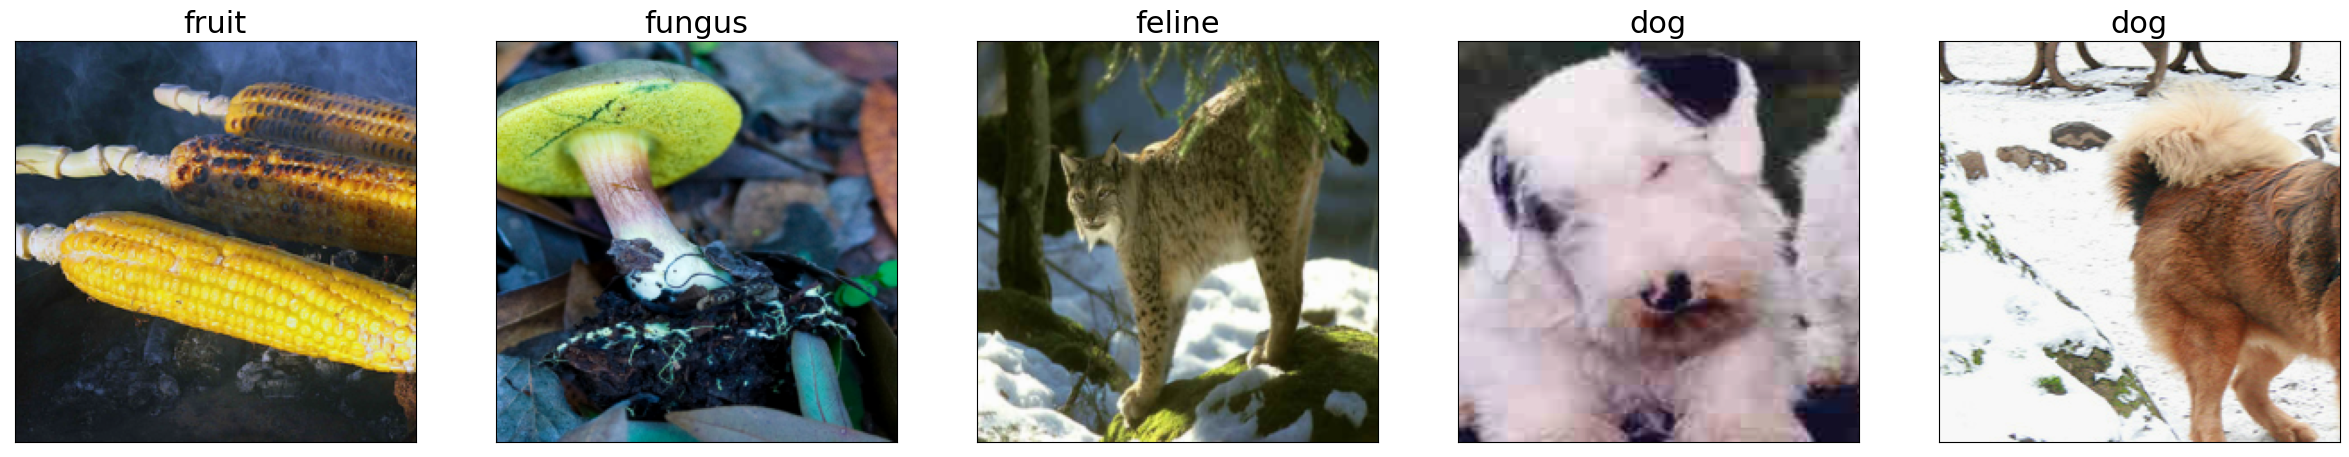

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


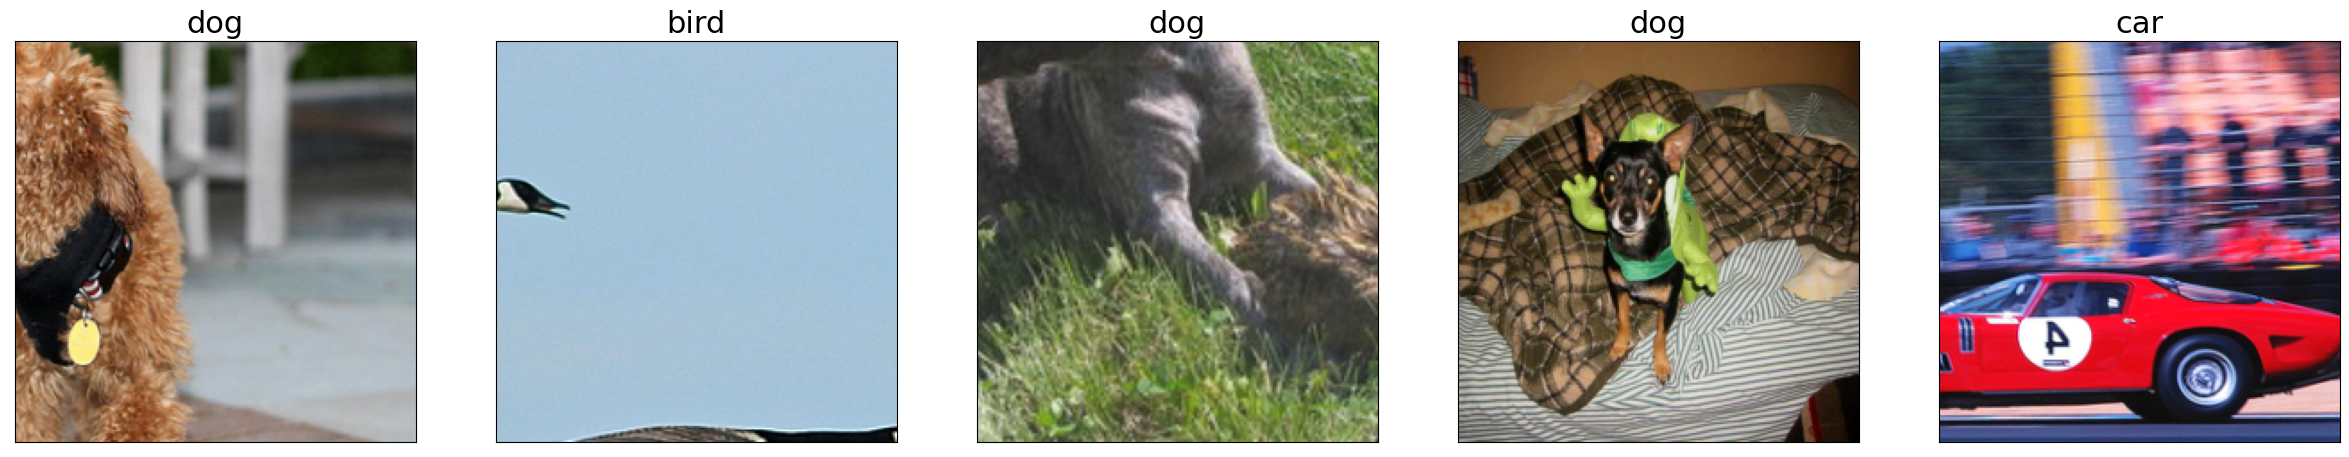

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


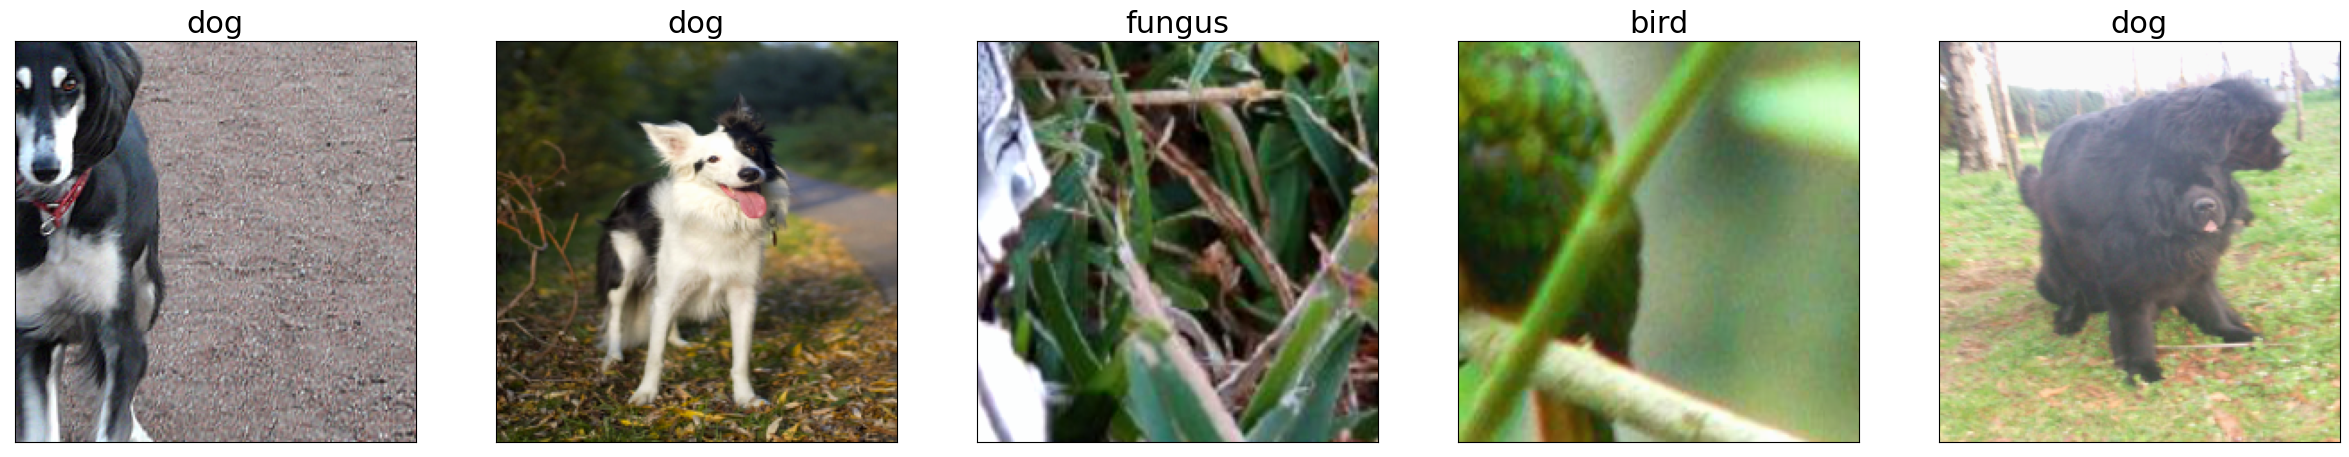

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


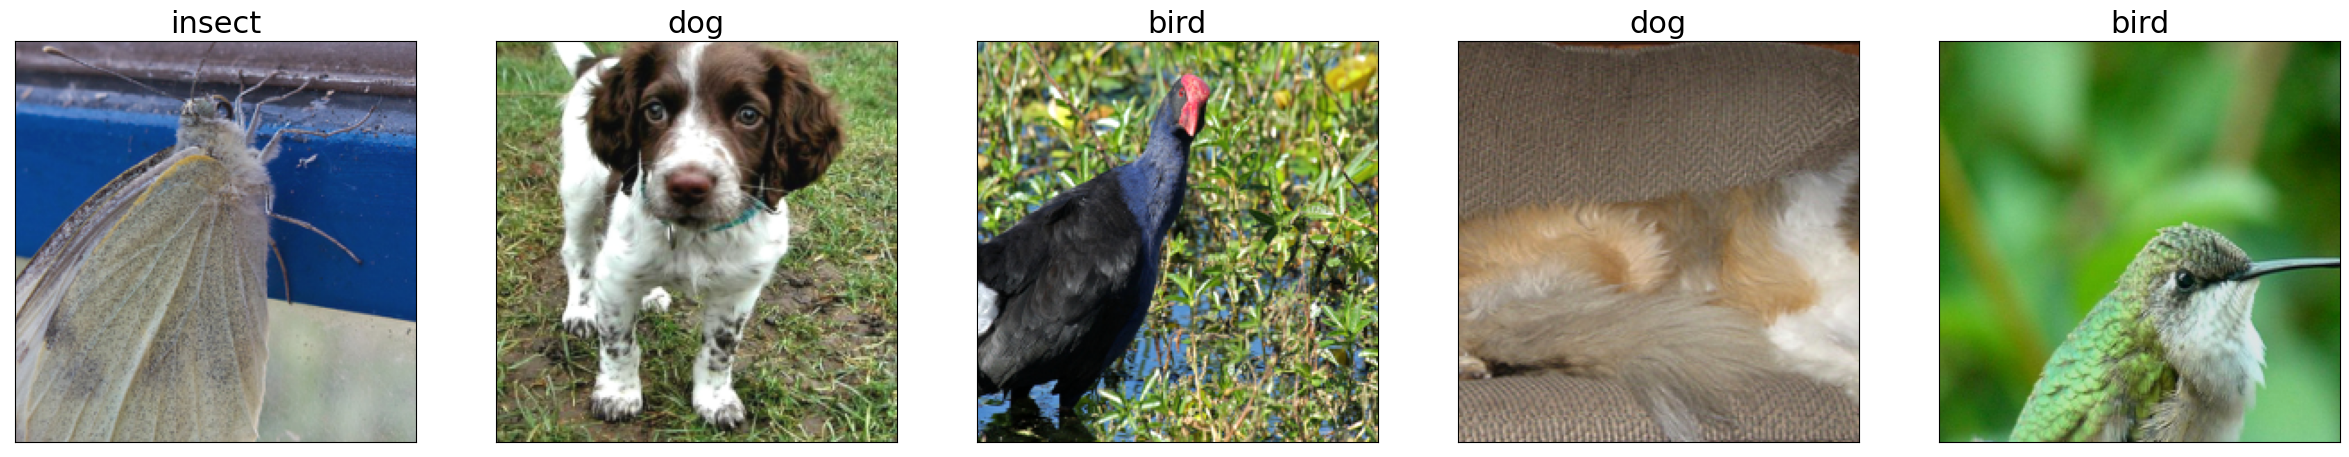

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


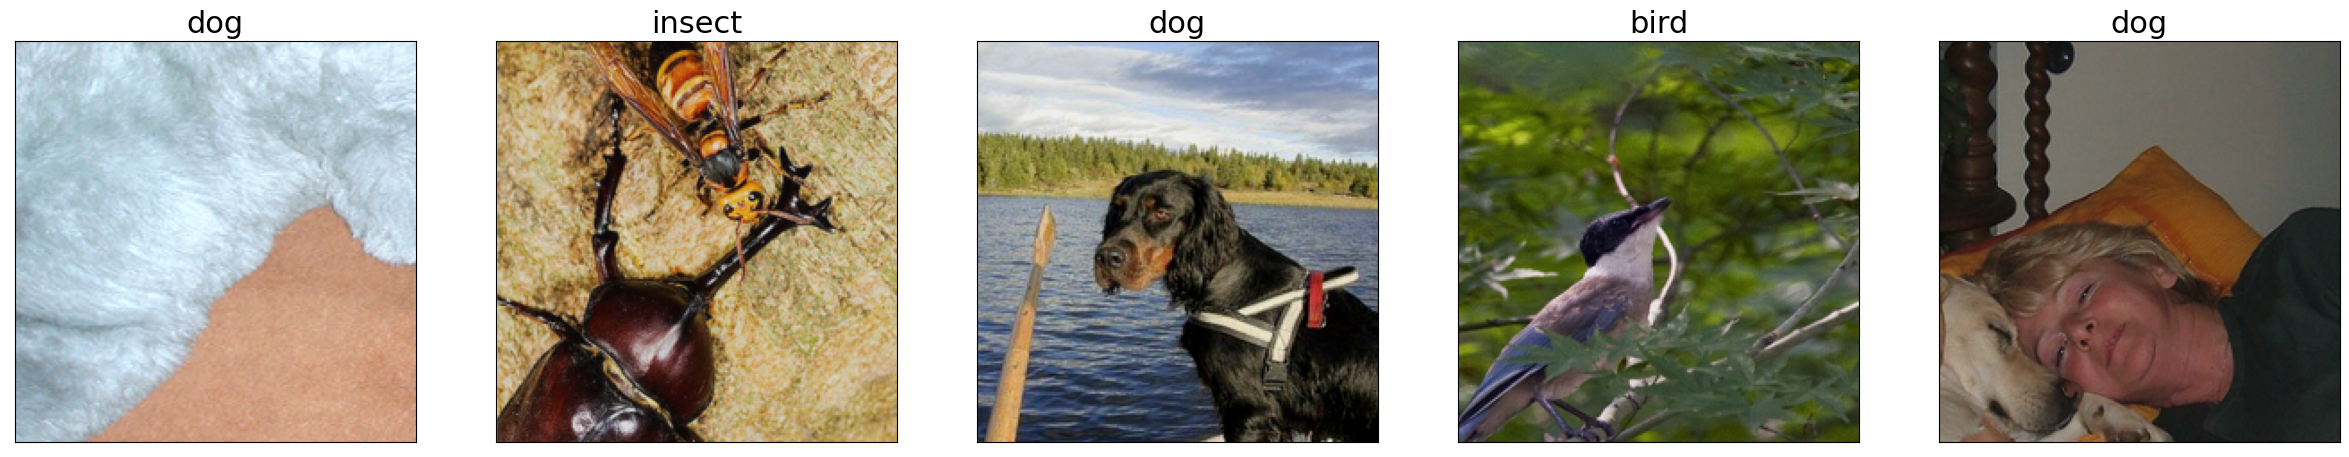

In [23]:
from robustness.tools.vis_tools import show_image_row
%matplotlib inline

iterator = enumerate(train_loader)

for _ in range(5):
    _, (im, lab) = next(iterator)

    show_image_row([im],
                   tlist=[[label_map[int(k)].split(',')[0] for k in lab]],
                  size=(6, 6),
                  fontsize=22)

In [30]:
from robustness import datasets

custom_dataset = datasets.CustomImageNet("/var/lib/data/imagenet-a",
                                         class_ranges)

_, test_loader = custom_dataset.make_loaders(workers=10,
                                                        batch_size=5, only_val=True)

#print(f"Train set size: {len(train_loader.dataset.targets)}")
print(f"Test set size: {len(test_loader.dataset.targets)}")

==> Preparing dataset custom_imagenet..
Test set size: 553


In [31]:
from robustness import datasets

custom_dataset = datasets.CustomImageNet("/var/lib/data/imagenet-r",
                                         class_ranges)

_, test_loader = custom_dataset.make_loaders(workers=10,
                                                        batch_size=5, only_val=True)

print(f"Train set size: {len(train_loader.dataset.targets)}")
print(f"Test set size: {len(test_loader.dataset.targets)}")

==> Preparing dataset custom_imagenet..
Test set size: 1680


In [28]:
[len(c) for c in class_ranges]

[116, 52, 27, 13, 10, 8, 7, 7, 7, 6]

In [24]:
from robustness import datasets

custom_dataset = datasets.CustomImageNet("/var/lib/data/imagenet-c",
                                         class_ranges)

_, test_loader = custom_dataset.make_loaders(workers=10,
                                                        batch_size=5, only_val=True)

#print(f"Train set size: {len(train_loader.dataset.targets)}")
print(f"Test set size: {len(test_loader.dataset.targets)}")

==> Preparing dataset custom_imagenet..


ValueError: Test data must be stored in dataset/test or /var/lib/data/imagenet-c/test